## Análisis EDA: Participantes Proveedores

### 1. Carga de datos

In [48]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

#### Leyendo el dataset, convirtiéndolo a parquet y mostrando los primeros rows

In [83]:
proveedores_df = pd.read_csv('../../data/Processed/All_Tables_Raw/participantes_proveedores_v2_Raw.csv')
proveedores_df.to_parquet('../../data/Processed/parquet_files/participantes_proveedores_v2_Raw.parquet')

In [49]:
proveedores_df = pd.read_parquet('../../data/Processed/parquet_files/participantes_proveedores_v2_Raw.parquet')

In [50]:
print(f"Proveedores con 'cve_expedinte' y 'cve_contrato' {proveedores_df.shape}")

Proveedores con 'cve_expedinte' y 'cve_contrato' (5623393, 16)


In [51]:
proveedores_df = proveedores_df[['identifier_id', 'roles', 'name',
                                 'identifier_legalName', 'identifier_scheme', 'identifier_uri',
                                 'address_countryName', 'address_locality', 'address_postalCode',
                                 'address_region', 'address_streetAddress', 'contactPoint_email',
                                 'contactPoint_name', 'contactPoint_telephone']]
print(f"Valores duplicados en proveedores: {proveedores_df.duplicated(subset='identifier_id').sum()}")
proveedores_df.drop_duplicates(inplace=True)  # Eliminar filas duplicadas
proveedores_df.drop_duplicates(subset='identifier_id', inplace=True)  # Eliminar identifier_id duplicadas
print(
    f"Proveedores sin las columnas 'cve_expediente' y 'cve_contrato', sin filas duplicadas y sin identificadores duplicados: {proveedores_df.shape}")
print(f"Proveedores únicos: {proveedores_df['identifier_id'].nunique()}")
print(f"Proveedores con 'identifier_id' nulos: {proveedores_df['identifier_id'].isna().sum()}")

print(f"Proveedores duplicados: {proveedores_df.duplicated(subset='identifier_id').sum()}")

Valores duplicados en proveedores: 5491144
Proveedores sin las columnas 'cve_expediente' y 'cve_contrato', sin filas duplicadas y sin identificadores duplicados: (132249, 14)
Proveedores únicos: 132248
Proveedores con 'identifier_id' nulos: 1
Proveedores duplicados: 0


In [52]:
# Obtener estadísticas descriptivas para todas las variables
descriptive_stats = proveedores_df.describe(include='all').transpose()
# Mostrar las estadísticas descriptivas
print(descriptive_stats)

                         count  unique  \
identifier_id           132248  132248   
roles                   132249       2   
name                    132249  129418   
identifier_legalName    132249  129418   
identifier_scheme       132249       1   
identifier_uri          132249       1   
address_countryName     121603      72   
address_locality        121602    7807   
address_postalCode       79611   10614   
address_region          120982     238   
address_streetAddress    79610   78460   
contactPoint_email      121603   80036   
contactPoint_name        98077   60782   
contactPoint_telephone   67506   65992   

                                                                      top  \
identifier_id                            04B3DC027ADD775B746959A20A80292A   
roles                                            ['tenderer', 'supplier']   
name                                              CAMYTERRA, S.A. DE C.V.   
identifier_legalName                              CAMYTERRA, 

### 2. Análisis del problema

#### 2.1 Estructura de los datos

In [53]:
proveedores_df.head()

,identifier_id,roles,name,identifier_legalName,identifier_scheme,identifier_uri,address_countryName,address_locality,address_postalCode,address_region,address_streetAddress,contactPoint_email,contactPoint_name,contactPoint_telephone
0,04B3DC027ADD775B746959A20A80292A,"['tenderer', 'supplier']","APLICACIONES INDUSTRIALES DE CALIDAD, S.A. DE ...","APLICACIONES INDUSTRIALES DE CALIDAD, S.A. DE ...",MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,ESTADO DE MEXICO,None,MX-MEX,None,ma.buzo@issste.gob.mx,- (Cuenta administrada por 'ISSSTE-Hospital Re...,None
1,5BECD127FEA6806B2A404D2B14A9CEEE,"['tenderer', 'supplier']",LEONOR HILDA BARRIOS SANCHEZ,LEONOR HILDA BARRIOS SANCHEZ,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,Centro,86284,MX-TAB,Senda de guayacan Mz 13 Lote 8 Parrilla 2,leona_b1364@hotmail.com,LEONOR HILDA BARRIOS SANCHEZ,993-1576647
2,TIN090211JC9,"['tenderer', 'supplier']",TOKA INTERNACIONAL S A P I DE CV,TOKA INTERNACIONAL S A P I DE CV,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,Zapopan,45086,MX-JAL,Ave. Montemorelos 3838-A Col. Loma Bonita,saul.davila@toka.mx; maricela.melendez@toka.mx...,SAUL GUILLERMO DAVILA JUAREZ,01 5531404494
3,3CEDE48206129D952B3EA0B6EA3E093D,"['tenderer', 'supplier']",PATRICIA SELENE SOLIS GALLEGOS,PATRICIA SELENE SOLIS GALLEGOS,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,Chihuahua,31137,MX-CHH,Diego Lucero 2 20 Aniversario,patriciasolis707@gmail.com,PATRICIA SELENE SOLIS GALLEGOS,614-2747722
4,AAB6B3F29F29293964209B17E7D72DAC,"['tenderer', 'supplier']",LUIS ALBERTO ESPINOZA VAZQUEZ,LUIS ALBERTO ESPINOZA VAZQUEZ,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,ECATEPEC DE MORELOS,None,MX-MEX,None,aarellano@inifed.gob.mx,- (Cuenta administrada por 'INIFED-Gerencia de...,None


In [54]:
proveedores_df.tail()

,identifier_id,roles,name,identifier_legalName,identifier_scheme,identifier_uri,address_countryName,address_locality,address_postalCode,address_region,address_streetAddress,contactPoint_email,contactPoint_name,contactPoint_telephone
5623304,OMA050330HW7,['tenderer'],ONE MALI SA DE CV,ONE MALI SA DE CV,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,GENERAL ESCOBEDO,66080,MX-NLE,Janitzio Caballero # 1649,efernandez@consorciouno.mx; ihurtado@consorcio...,None,52 81 83338224
5623364,BIW141222GS6,['tenderer'],BUSINESS IN A WAVE SA DE CV,BUSINESS IN A WAVE SA DE CV,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,ZAPOPAN,45080,MX-JAL,"LOPEZ MATEOS SUR 4321, COLONIA PINAR DE LA CALMA",AGUSTIN@BWDIGITAL.IO,None,None
5623367,RTI140205BAA,['tenderer'],RECUPERACIONES TINAJERO SA DE CV,RECUPERACIONES TINAJERO SA DE CV,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,IZTAPALAPA,09209,MX-CMX,CALLE 6 MZ. 6 LT. 23 COL. PURISIMA 1,RECUPERA-T@HOTMAIL.COM,None,55 88485907
5623386,LGR061118PA1,"['tenderer', 'supplier']",LMR GRUP SA DE CV,LMR GRUP SA DE CV,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,Tampico,89110,MX-TAM,Agua Dulce #212-G Fraccionamiento La Florida,lmrgrup@hotmail.com;clau_lmrgrup@hotmail.com,Livio Ramirez Barrientos,52 833 2276060
5623387,TTA210305S83,"['tenderer', 'supplier']",TOPO TACTICO SA DE CV,TOPO TACTICO SA DE CV,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,Miguel Hidalgo,11520,MX-CMX,AV EJERCITO NACIONAL 373 GRANADA,fcogaona@capitalsatelite.com;Topotacticosa@gma...,MANUEL FRANCO ARANZA,55-5555450299


#### 2.2 Información General

In [55]:
proveedores_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132249 entries, 0 to 5623387
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   identifier_id           132248 non-null  object
 1   roles                   132249 non-null  object
 2   name                    132249 non-null  object
 3   identifier_legalName    132249 non-null  object
 4   identifier_scheme       132249 non-null  object
 5   identifier_uri          132249 non-null  object
 6   address_countryName     121603 non-null  object
 7   address_locality        121602 non-null  object
 8   address_postalCode      79611 non-null   object
 9   address_region          120982 non-null  object
 10  address_streetAddress   79610 non-null   object
 11  contactPoint_email      121603 non-null  object
 12  contactPoint_name       98077 non-null   object
 13  contactPoint_telephone  67506 non-null   object
dtypes: object(14)
memory usage: 15.1+ MB


#### 2.3 Estadísticas descriptivas

En este caso no hay estadísticas descriptivas porque no hay variables numéricas en esta tabla

### 3. Análisis Univariado

In [56]:
# Roles
print(proveedores_df['roles'].value_counts(dropna=False))
print(f"Valores únicos en 'roles': {proveedores_df['roles'].nunique()}")

roles
['tenderer', 'supplier']    98077
['tenderer']                34172
Name: count, dtype: int64
Valores únicos en 'roles': 2


In [57]:
# Identifier Scheme
print(proveedores_df['identifier_scheme'].value_counts(dropna=False))
print(f"Valores duplicados en 'identifier_scheme': {proveedores_df['identifier_scheme'].duplicated().sum()}")
print(f"Valores nulos en 'identifier_scheme': {proveedores_df['identifier_scheme'].isna().sum()}")
print(f"Valores únicos en 'identifier_scheme': {proveedores_df['identifier_scheme'].nunique()}")

identifier_scheme
MX-RFC    132249
Name: count, dtype: int64
Valores duplicados en 'identifier_scheme': 132248
Valores nulos en 'identifier_scheme': 0
Valores únicos en 'identifier_scheme': 1


### 4.2 Variables Categóricas

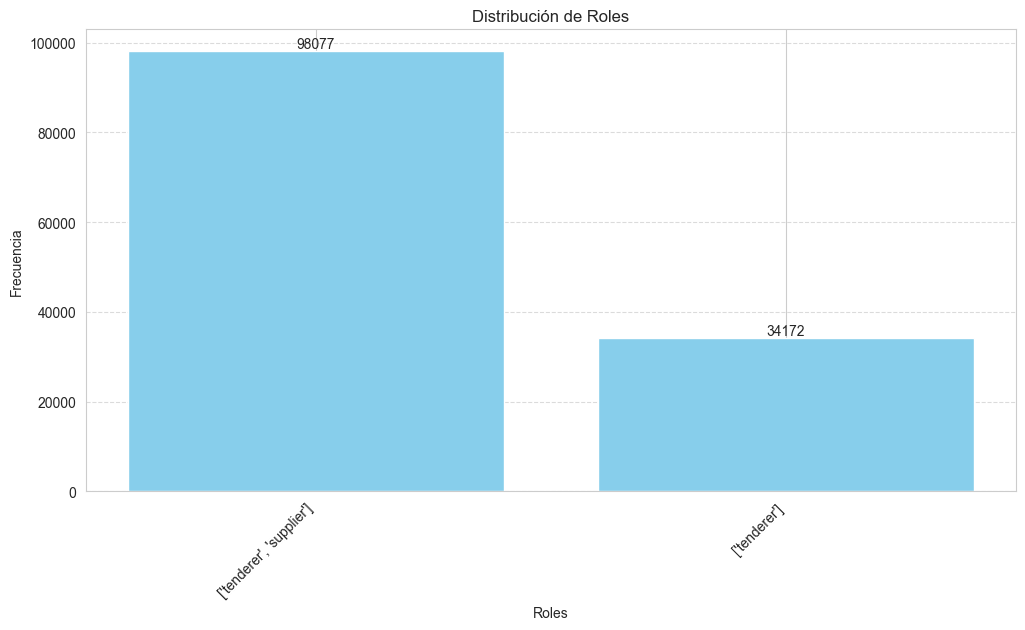

In [58]:
# Generar histograma para la variable 'roles'
plt.figure(figsize=(12, 6))
roles_counts = proveedores_df['roles'].value_counts(dropna=False)
bars = plt.bar(roles_counts.index, roles_counts.values, color='skyblue')

# Añadir anotaciones
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, yval, ha='center', va='bottom')

plt.xlabel('Roles')
plt.ylabel('Frecuencia')
plt.title('Distribución de Roles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [85]:
# Proveedores que son de Mexico
proveedores_df_mexico = proveedores_df.loc[proveedores_df['address_countryName'] == 'MÉXICO']
print(f"Proveedores de México: {proveedores_df_mexico.shape[0]}")

Proveedores de México: 120143


Valores únicos en 'address_countryName': 72
Valores nulos en 'address_countryName': 10646


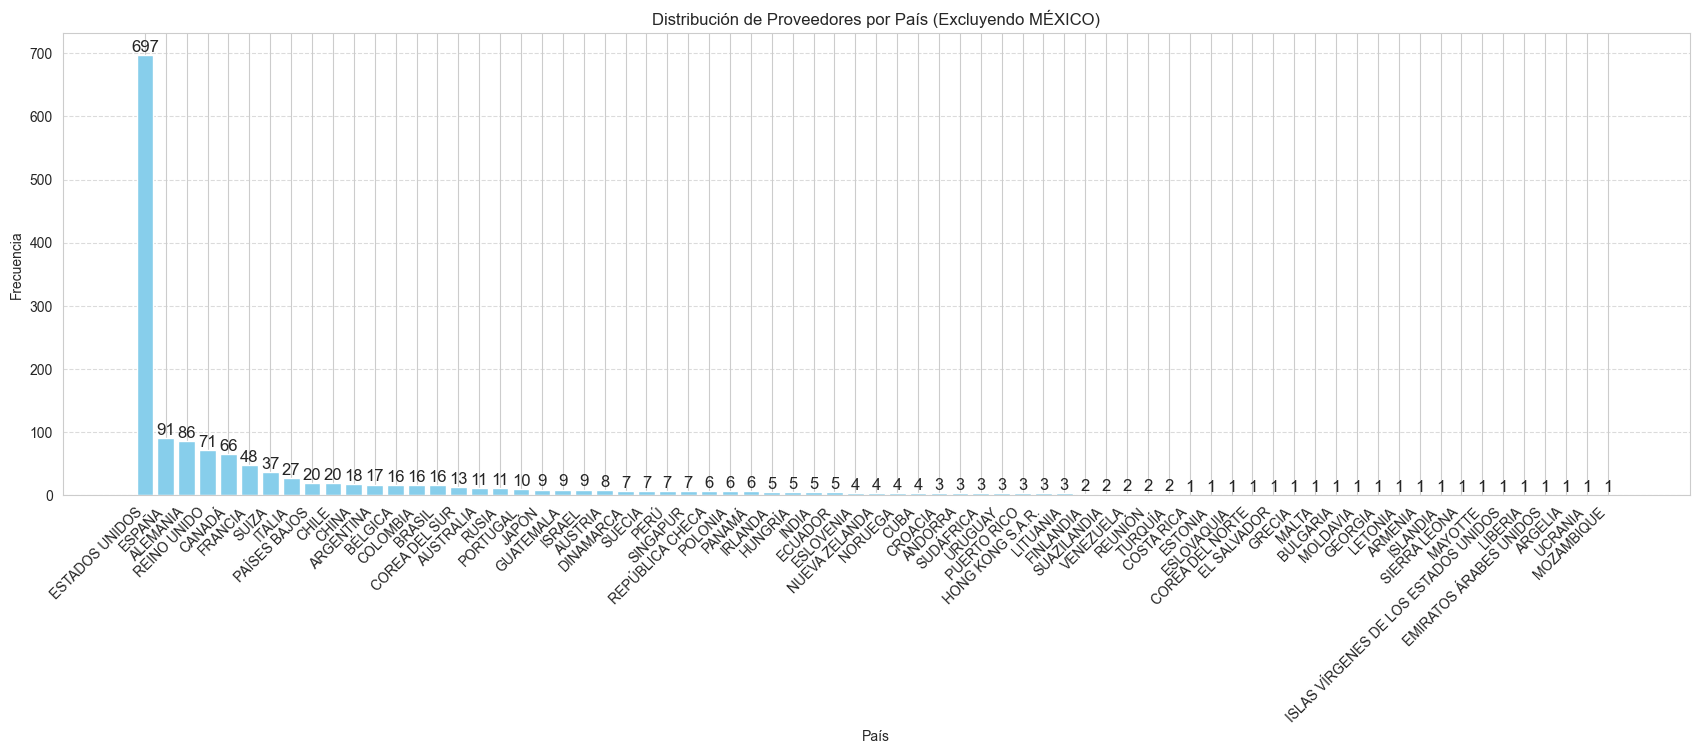

In [96]:
# Generar histograma para la variable 'address_countryName' sin México
plt.figure(figsize=(21, 6))
proveedores_df_no_mexico = proveedores_df.loc[proveedores_df['address_countryName'] != 'MÉXICO']
proveedores_df_no_usa = proveedores_df.loc[
    (proveedores_df['address_countryName'] != 'MÉXICO') & (proveedores_df['address_countryName'] != 'ESTADOS UNIDOS')]
country_counts = proveedores_df_no_mexico['address_countryName'].value_counts(dropna=True)
print(f"Valores únicos en 'address_countryName': {proveedores_df['address_countryName'].nunique()}")
print
print(f"Valores nulos en 'address_countryName': {proveedores_df['address_countryName'].isna().sum()}")
bars = plt.bar(country_counts.index, country_counts.values, color='skyblue')

# Añadir anotaciones
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, yval, ha='center', va='bottom', fontsize=12)

plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.title('Distribución de Proveedores por País (Excluyendo MÉXICO)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

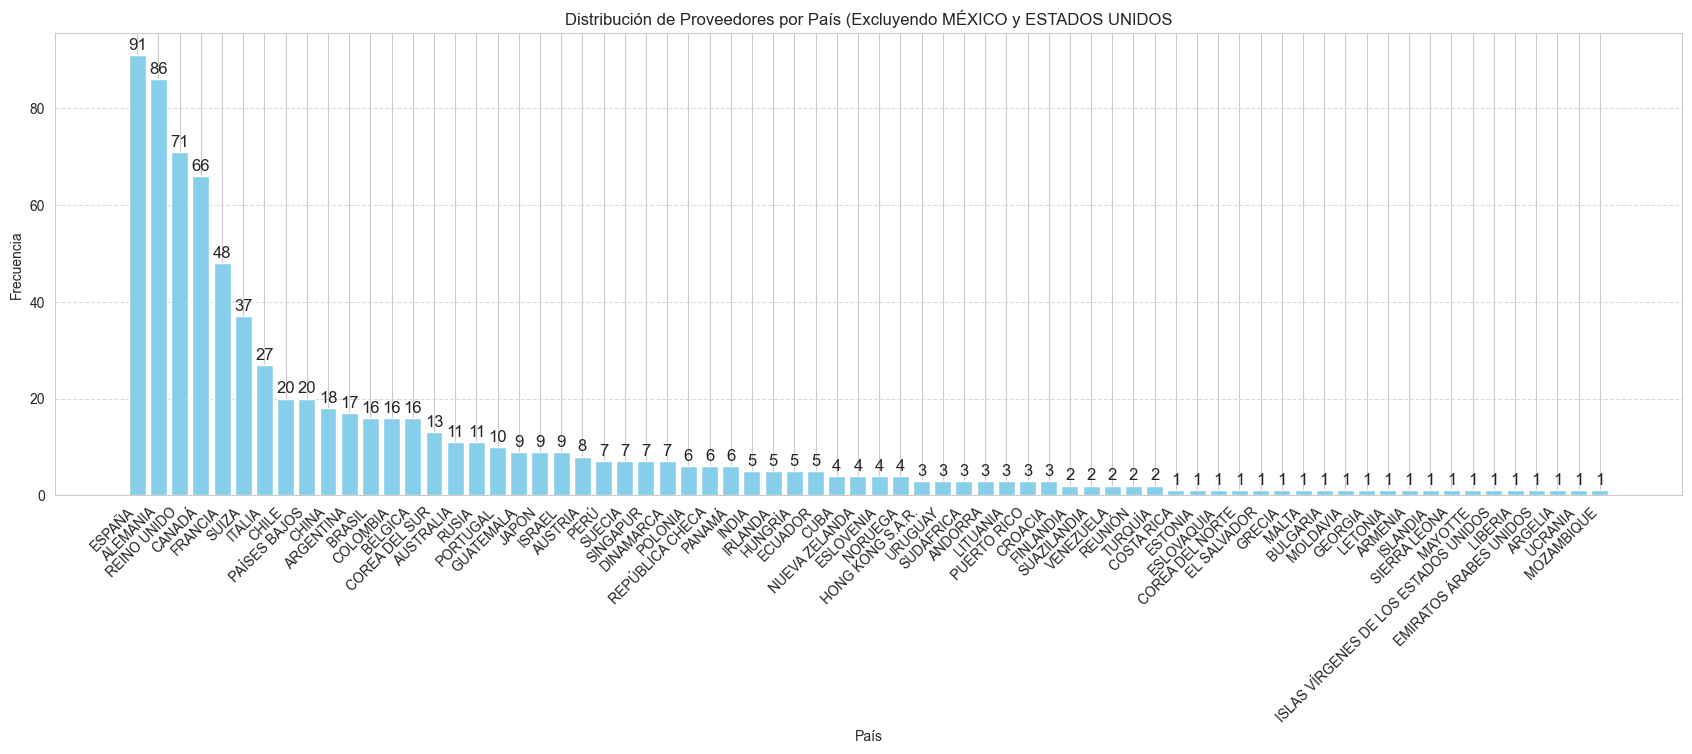

In [95]:
# Generar histograma para la variable 'address_countryName' sin Mexico y EEUU
plt.figure(figsize=(21, 6))
proveedores_df_no_usa = proveedores_df.loc[
    (proveedores_df['address_countryName'] != 'MÉXICO') & (proveedores_df['address_countryName'] != 'ESTADOS UNIDOS')]
country_counts = proveedores_df_no_usa['address_countryName'].value_counts(dropna=True)

bars = plt.bar(country_counts.index, country_counts.values, color='skyblue')

# Añadir anotaciones
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, yval, ha='center', va='bottom', fontsize=12)

plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.title('Distribución de Proveedores por País (Excluyendo MÉXICO y ESTADOS UNIDOS')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 5. Detección de Outliers

En este caso no hay detección de outliers porque no hay variables numéricas

### 7. Preguntas de Negocio

#### 7.1 Cuáles son los países con más proveedores, excluyendo México 

Valores únicos en 'address_countryName': 72
Valores nulos en 'address_countryName': 10646


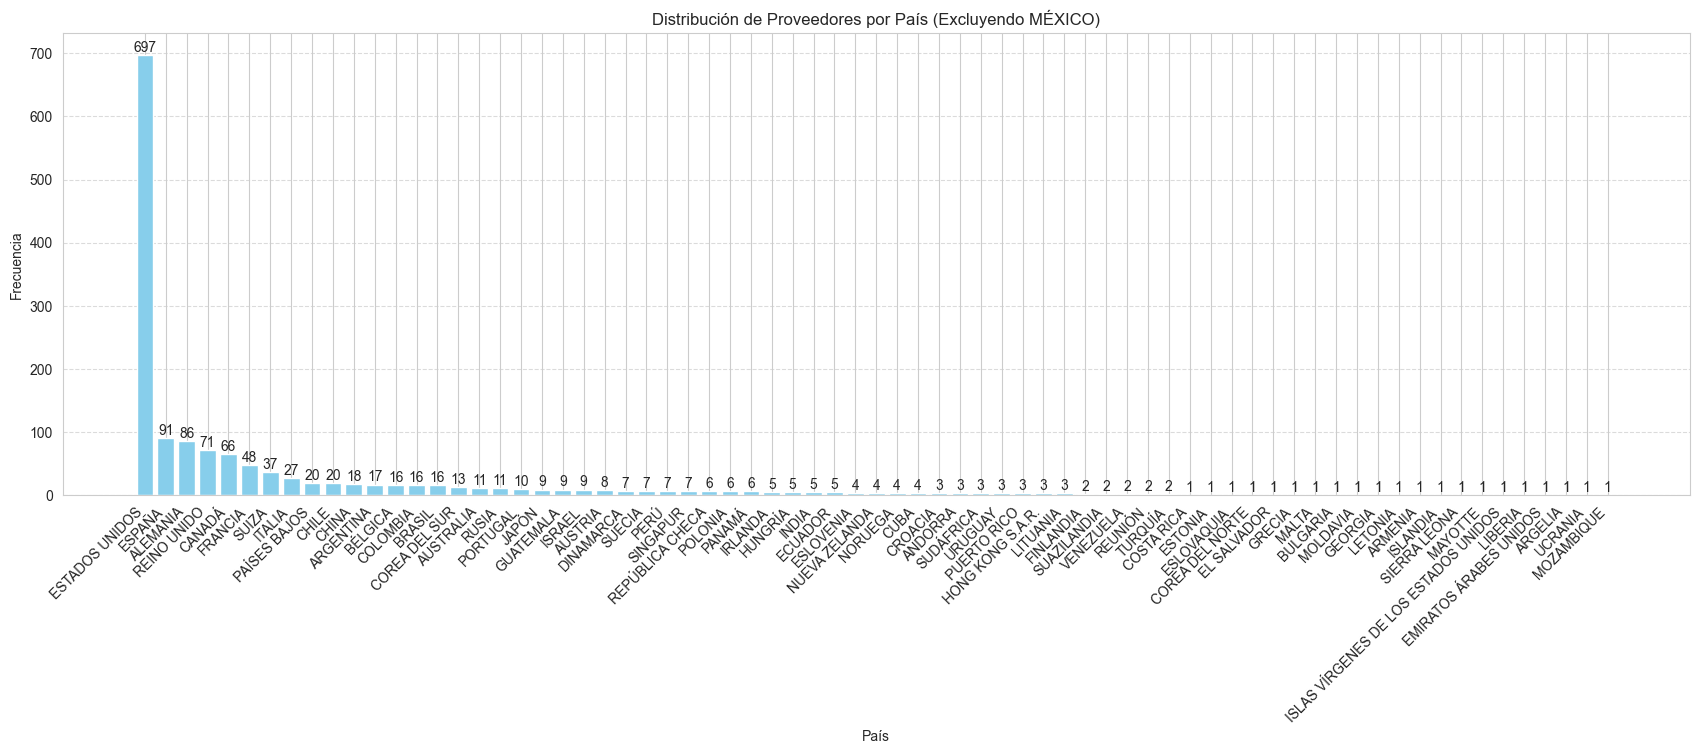

In [61]:
# Generar histograma para la variable 'address_countryName' sin México
plt.figure(figsize=(21, 6))
proveedores_df_no_mexico = proveedores_df.loc[proveedores_df['address_countryName'] != 'MÉXICO']
proveedores_df_no_usa = proveedores_df.loc[
    (proveedores_df['address_countryName'] != 'MÉXICO') & (proveedores_df['address_countryName'] != 'ESTADOS UNIDOS')]
country_counts = proveedores_df_no_mexico['address_countryName'].value_counts(dropna=True)
print(f"Valores únicos en 'address_countryName': {proveedores_df['address_countryName'].nunique()}")
print
print(f"Valores nulos en 'address_countryName': {proveedores_df['address_countryName'].isna().sum()}")
bars = plt.bar(country_counts.index, country_counts.values, color='skyblue')

# Añadir anotaciones
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, yval, ha='center', va='bottom')

plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.title('Distribución de Proveedores por País (Excluyendo MÉXICO)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 7.2 Cuáles son las regiones de México con más proveedores?

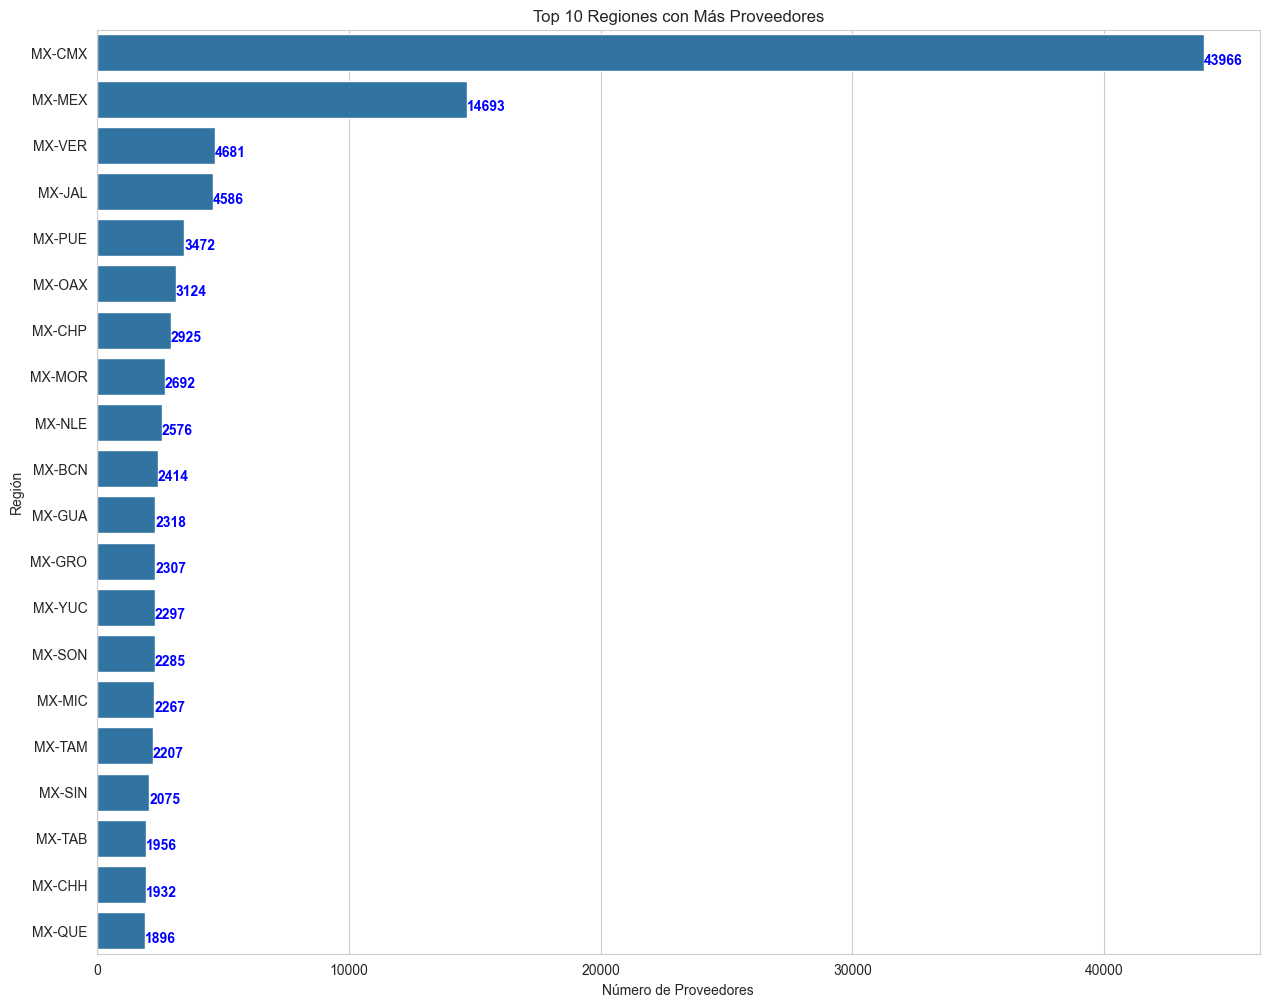

In [62]:
# Calcular el conteo de proveedores por región
region_counts = proveedores_df['address_region'].value_counts()

# Seleccionar el top 10 de regiones con más proveedores
top_10_regions = region_counts.head(20)

# Generar el histograma
plt.figure(figsize=(15, 12))
bars = sns.barplot(y=top_10_regions.index, x=top_10_regions.values)

# Añadir anotaciones
for i, v in enumerate(top_10_regions.values):
    plt.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.title('Top 10 Regiones con Más Proveedores')
plt.xlabel('Número de Proveedores')
plt.ylabel('Región')
plt.show()

#### 7.3 Calidad de Información en datos de contacto

In [63]:
# Verificar datos de contacto completos
proveedores_df['contact_complete'] = proveedores_df[
    ['contactPoint_email', 'contactPoint_name', 'contactPoint_telephone']].notnull().all(axis=1)

# Número de proveedores con datos de contacto completos
num_complete_contacts = proveedores_df['contact_complete'].sum()

# Porcentaje de proveedores con datos de contacto completos
percent_complete_contacts = (num_complete_contacts / len(proveedores_df)) * 100

# Número de proveedores con datos de contacto faltantes
num_incomplete_contacts = len(proveedores_df) - num_complete_contacts

# Porcentaje de proveedores con datos de contacto faltantes
percent_incomplete_contacts = (num_incomplete_contacts / len(proveedores_df)) * 100

# Resultados
print(f"Número de proveedores con datos de contacto completos: {num_complete_contacts}")
print(f"Porcentaje de proveedores con datos de contacto completos: {percent_complete_contacts:.2f}%")
print(f"Número de proveedores con datos de contacto faltantes: {num_incomplete_contacts}")
print(f"Porcentaje de proveedores con datos de contacto faltantes: {percent_incomplete_contacts:.2f}%")

Número de proveedores con datos de contacto completos: 60132
Porcentaje de proveedores con datos de contacto completos: 45.47%
Número de proveedores con datos de contacto faltantes: 72117
Porcentaje de proveedores con datos de contacto faltantes: 54.53%


#### 7.4 Número promedio de contratos por proveedor y proveedores con la mayor cantidad de contratos

#### 7.5 ¿Porcentaje de información faltante en las siguientes variables? 
address_country_name, address_locality, address_postalcode, address_streetaddress,
contact_point_email, contact_point_name y contact_point_telephone


In [64]:
# address_countryName
cant_nan_address_countryName = proveedores_df['address_countryName'].isna().sum()
percentage_nan_address_countryName = cant_nan_address_countryName / len(proveedores_df) * 100
print(f"Cantidad de información faltante en la variable 'address_countryName': {cant_nan_address_countryName}")
print(
    f"Porcentaje de información faltante en la variable 'address_countryName': {percentage_nan_address_countryName:.4f}%")



Cantidad de información faltante en la variable 'address_countryName': 10646
Porcentaje de información faltante en la variable 'address_countryName': 8.0500%


In [65]:
# address_locality
cant_nan_address_locality = proveedores_df['address_locality'].isna().sum()
percentage_nan_address_locality = cant_nan_address_locality / len(proveedores_df) * 100
print(f"Cantidad de información faltante en la variable 'address_locality': {cant_nan_address_locality}")
print(f"Porcentaje de información faltante en la variable 'address_locality': {percentage_nan_address_locality:.4f}%")
sin_info_count = proveedores_df['address_locality'].value_counts().get('Sin información', 0)
print(f"Valores únicos en la variable 'address_locality' sin información: {sin_info_count} ")
unique_localities_count = proveedores_df['address_locality'].nunique()
print(f"Cantidad de valores únicos en la variable 'address_locality': {unique_localities_count}")
for s in proveedores_df['address_locality'].unique()[:20]:
    print(s)

Cantidad de información faltante en la variable 'address_locality': 10647
Porcentaje de información faltante en la variable 'address_locality': 8.0507%
Valores únicos en la variable 'address_locality' sin información: 1 
Cantidad de valores únicos en la variable 'address_locality': 7807
ESTADO DE MEXICO
Centro
Zapopan
Chihuahua
ECATEPEC DE MORELOS
IZTACALCO
Irapuato
CUAUHTEMOC
Cuauhtémoc
BENITO JUÁREZ
TLALPAN
ALVARO OBREGON
ATLACOMULCO
Azcapotzalco
Miguel Hidalgo
MIGUEL HIDALGO
Tlanepantla de Baz
CENTRO
TOLUCA
Benito Juárez


In [66]:
# address_postalCode
cant_nan_address_postalCode = proveedores_df['address_postalCode'].isna().sum()
percentage_nan_address_postalCode = cant_nan_address_postalCode / len(proveedores_df) * 100
print(f"Cantidad de información faltante en la variable 'address_postalCode': {cant_nan_address_postalCode}")
print(
    f"Porcentaje de información faltante en la variable 'address_postalCode': {percentage_nan_address_postalCode:.4f}%")

Cantidad de información faltante en la variable 'address_postalCode': 52638
Porcentaje de información faltante en la variable 'address_postalCode': 39.8022%


In [67]:
# address_streetAddress
cant_nan_address_streetAddress = proveedores_df['address_streetAddress'].isna().sum()
percentage_nan_address_streetAddress = cant_nan_address_streetAddress / len(proveedores_df) * 100
print(f"Cantidad de información faltante en la variable 'address_streetAddress': {cant_nan_address_streetAddress}")
print(
    f"Porcentaje de información faltante en la variable 'address_streetAddress': {percentage_nan_address_streetAddress:.4f}%")

Cantidad de información faltante en la variable 'address_streetAddress': 52639
Porcentaje de información faltante en la variable 'address_streetAddress': 39.8029%


In [68]:
# contactPoint_email
cant_nan_contactPoint_email = proveedores_df['contactPoint_email'].isna().sum()
percentage_nan_contactPoint_email = cant_nan_contactPoint_email / len(proveedores_df) * 100
print(f"Cantidad de información faltante en la variable 'contactPoint_email': {cant_nan_contactPoint_email}")
print(
    f"Porcentaje de información faltante en la variable 'contactPoint_email': {percentage_nan_contactPoint_email:.4f}%")

Cantidad de información faltante en la variable 'contactPoint_email': 10646
Porcentaje de información faltante en la variable 'contactPoint_email': 8.0500%


In [69]:
# contactPoint_name
cant_nan_contactPoint_name = proveedores_df['contactPoint_name'].isna().sum()
percentage_nan_contactPoint_name = cant_nan_contactPoint_name / len(proveedores_df) * 100
print(f"Cantidad de información faltante en la variable 'contactPoint_name': {cant_nan_contactPoint_name}")
print(f"Porcentaje de información faltante en la variable 'contactPoint_name': {percentage_nan_contactPoint_name:.4f}%")

Cantidad de información faltante en la variable 'contactPoint_name': 34172
Porcentaje de información faltante en la variable 'contactPoint_name': 25.8391%


In [70]:
# contactPoint_telephone
cant_nan_contactPoint_telephone = proveedores_df['contactPoint_telephone'].isna().sum()
percentage_nan_contactPoint_telephone = cant_nan_contactPoint_telephone / len(proveedores_df) * 100
print(f"Cantidad de información faltante en la variable 'contactPoint_telephone': {cant_nan_contactPoint_telephone}")
print(
    f"Porcentaje de información faltante en la variable 'contactPoint_telephone': {percentage_nan_contactPoint_telephone:.4f}%")

Cantidad de información faltante en la variable 'contactPoint_telephone': 64743
Porcentaje de información faltante en la variable 'contactPoint_telephone': 48.9554%


In [71]:
# Todas las variables consultadas nulas
proveedores_all_columns_nan = proveedores_df[
    proveedores_df['address_countryName'].isna() & proveedores_df['address_locality'].isna() &
    proveedores_df['address_postalCode'].isna() & proveedores_df['address_streetAddress'].isna() &
    proveedores_df['contactPoint_email'].isna() & proveedores_df['contactPoint_name'].isna() &
    proveedores_df['contactPoint_telephone'].isna()]
# Rol de los proveedores con todas las columnas nulas
print(f"Rol de Proveedores con todas las columnas nulas: {proveedores_all_columns_nan['roles'].unique()[0]}")

# Rol 'tenderer' de los proveedores con todas las columnas nulas
proveedores_all_columns_nan_supplier = proveedores_all_columns_nan[proveedores_all_columns_nan['roles'] == 'supplier']
print(f"Proveedores con todas las columnas nulas y rol 'supplier': {proveedores_all_columns_nan_supplier.shape[0]}")
proveedores_all_columns_nan_both = proveedores_all_columns_nan[
    proveedores_all_columns_nan['roles'] == 'tenderer,supplier']
print(f"Proveedores con todas las columnas nulas y ambos roles: {proveedores_all_columns_nan_both.shape[0]}")

Rol de Proveedores con todas las columnas nulas: ['tenderer']
Proveedores con todas las columnas nulas y rol 'supplier': 0
Proveedores con todas las columnas nulas y ambos roles: 0


In [99]:
proveedores_all_columns_nan

,identifier_id,roles,name,identifier_legalName,identifier_scheme,identifier_uri,address_countryName,address_locality,address_postalCode,address_region,address_streetAddress,contactPoint_email,contactPoint_name,contactPoint_telephone,contact_complete
74,3B277D6DA41EB41E228E1C5B23360E16,['tenderer'],ALEJANDRO CONSTANTINO ESCOBAR SOTELO,ALEJANDRO CONSTANTINO ESCOBAR SOTELO,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,None,None,None,None,None,None,None,None,False
153,64979E1CD57A87688F282750FE978883,['tenderer'],JOSE ROSENDO SANCHEZ RESENDIZ,JOSE ROSENDO SANCHEZ RESENDIZ,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,None,None,None,None,None,None,None,None,False
197,44D1D40D6B89398F7610755092A2B6B1,['tenderer'],RICARDO GARCILIANO LEON,RICARDO GARCILIANO LEON,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,None,None,None,None,None,None,None,None,False
198,CE1BBB393FDA489E519629B0862E2660,['tenderer'],MIGUEL ARMANDO ARCOS LANDERO,MIGUEL ARMANDO ARCOS LANDERO,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,None,None,None,None,None,None,None,None,False
199,0B06387B2BA8593490034078557C9A9B,['tenderer'],MARIA SILVIA MOO MOO,MARIA SILVIA MOO MOO,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,None,None,None,None,None,None,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620269,1D0518A8FD22E6BA6B4F469C0959039C,['tenderer'],JOSE ALBERTO VAZQUEZ ZARCO,JOSE ALBERTO VAZQUEZ ZARCO,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,None,None,None,None,None,None,None,None,False
5620602,507356EE6A77A275FA7EB05116CD8575,['tenderer'],JOSE LINO CAMARA RODRIGUEZ,JOSE LINO CAMARA RODRIGUEZ,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,None,None,None,None,None,None,None,None,False
5620796,D76E53084C49211269D0F23F5273565A,['tenderer'],EDHER IGOR CORTES JIMENEZ,EDHER IGOR CORTES JIMENEZ,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,None,None,None,None,None,None,None,None,False
5621205,CA96C5EFFF84CBD0BDAC30DAD4399FB4,['tenderer'],NOE MORA FIGUEROA,NOE MORA FIGUEROA,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,None,None,None,None,None,None,None,None,False


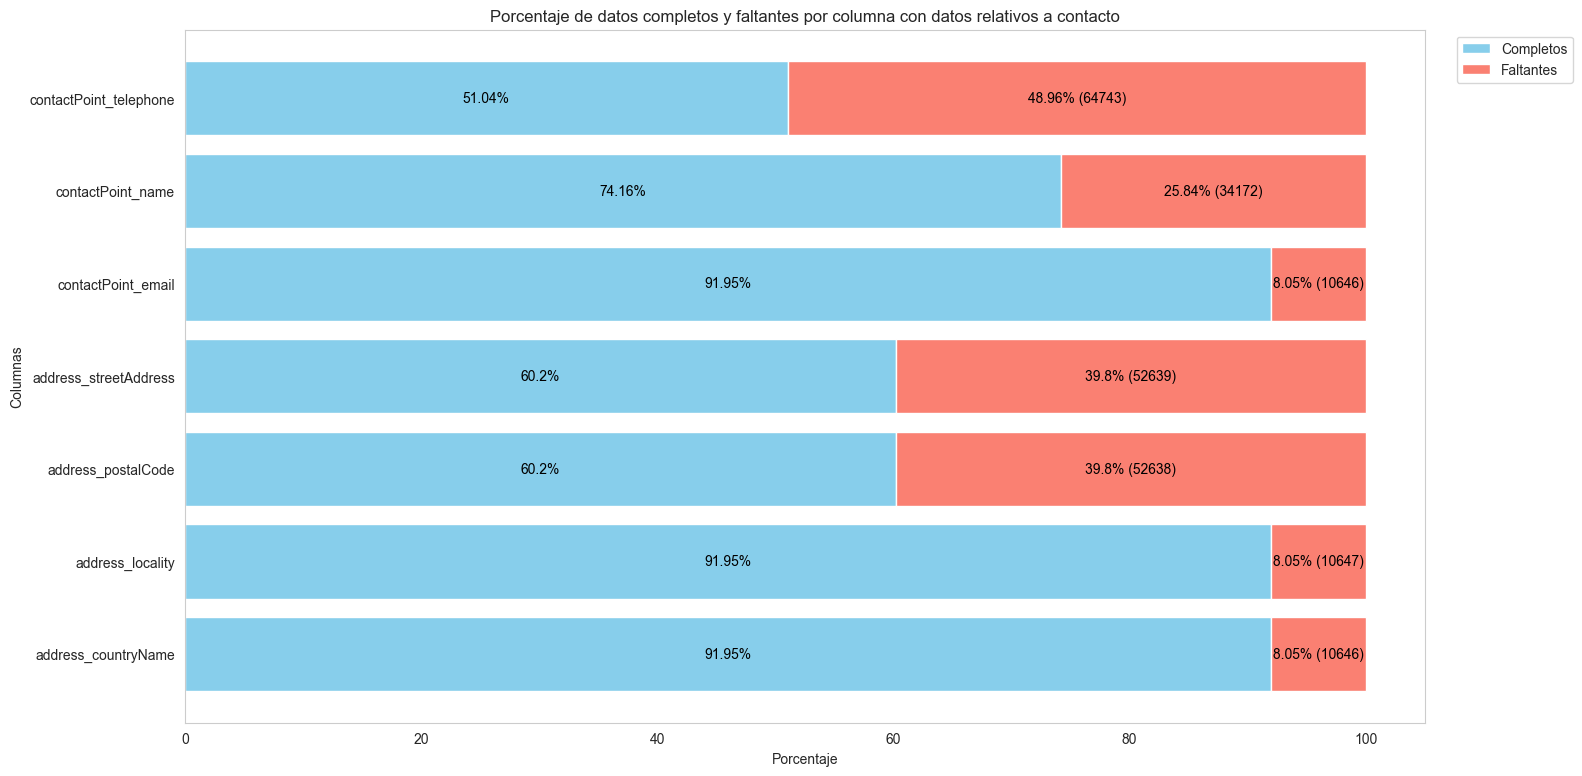

In [97]:
# Lista de columnas de interés
columns = ['address_countryName', 'address_locality', 'address_postalCode', 'address_streetAddress',
           'contactPoint_email', 'contactPoint_name', 'contactPoint_telephone']

# Calcular el porcentaje y la cantidad de datos completos y faltantes para cada columna
complete_data = proveedores_df[columns].notna().mean() * 100
missing_data = proveedores_df[columns].isna().mean() * 100
missing_count = proveedores_df[columns].isna().sum()

# Crear un DataFrame con los resultados
data_df = pd.DataFrame({'column_name': complete_data.index,
                        'percentage_complete': complete_data.values,
                        'percentage_missing': missing_data.values,
                        'missing_count': missing_count.values})

# Generar el gráfico de barras
plt.figure(figsize=(16, 9))
bar1 = plt.barh(data_df['column_name'], data_df['percentage_complete'], color='skyblue')
bar2 = plt.barh(data_df['column_name'], data_df['percentage_missing'], left=data_df['percentage_complete'], color='salmon')

plt.xlabel('Porcentaje')
plt.ylabel('Columnas')
plt.title('Porcentaje de datos completos y faltantes por columna con datos relativos a contacto')
plt.legend([bar1, bar2], ['Completos', 'Faltantes'], bbox_to_anchor=(1.02, 1), loc='upper left')

# Añadir anotaciones
for i in range(data_df.shape[0]):
    plt.text(data_df.percentage_complete.iloc[i]/2, i,
             str(np.round(data_df.percentage_complete.iloc[i], 2)) + '%',
             va = 'center', ha='center', fontsize=10, color='black')
    plt.text(data_df.percentage_complete.iloc[i] + data_df.percentage_missing.iloc[i]/2, i,
             str(np.round(data_df.percentage_missing.iloc[i], 2)) + '% (' + str(data_df.missing_count.iloc[i]) + ')',
             va = 'center', ha='center', fontsize=10, color='black')
plt.grid(False)
plt.show()